# CIFAR-10

CIFAR-10 dataset: http://www.cs.toronto.edu/~kriz/cifar.html

#### Cieľ zadania: Klasifikácia obrázku jednej z nasledujúcich tried:
• 0: airplane\
• 1: automobile\
• 2: bird\
• 3: cat\
• 4: deer\
• 5: dog\
• 6: frog\
• 7: horse\
• 8: ship\
• 9: truck

In [36]:
from matplotlib import pyplot
from keras.datasets import cifar10

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import wandb
from wandb.keras import WandbCallback

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
def countValues(data):
    unique_vals, counts = np.unique(data, return_counts=True)

    for val, count in zip(unique_vals, counts):
        print("Class {}: {} records".format(val, count))

In [38]:
def dataNormalisation(data):
    return data.astype('float32') / 255.0

In [39]:
dataClass = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

In [40]:
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

print('Train dataset:\n X=%s\n y=%s\n' % (X_train.shape, y_train.shape))
print('Validation dataset:\n X=%s\n y=%s' % (X_val.shape, y_val.shape))

Train dataset:
 X=(50000, 32, 32, 3)
 y=(50000, 1)

Validation dataset:
 X=(10000, 32, 32, 3)
 y=(10000, 1)


In [41]:
countValues(y_train)

Class 0: 5000 records
Class 1: 5000 records
Class 2: 5000 records
Class 3: 5000 records
Class 4: 5000 records
Class 5: 5000 records
Class 6: 5000 records
Class 7: 5000 records
Class 8: 5000 records
Class 9: 5000 records


In [42]:
countValues(y_val)

Class 0: 1000 records
Class 1: 1000 records
Class 2: 1000 records
Class 3: 1000 records
Class 4: 1000 records
Class 5: 1000 records
Class 6: 1000 records
Class 7: 1000 records
Class 8: 1000 records
Class 9: 1000 records


Normalizacia dat do intervalu 0 - 1

In [43]:
X_train = dataNormalisation(X_train)
X_val = dataNormalisation(X_val)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=25)

In [44]:
countValues(y_val)

Class 0: 497 records
Class 1: 482 records
Class 2: 507 records
Class 3: 504 records
Class 4: 500 records
Class 5: 511 records
Class 6: 494 records
Class 7: 507 records
Class 8: 494 records
Class 9: 504 records


In [45]:
countValues(y_test)

Class 0: 503 records
Class 1: 518 records
Class 2: 493 records
Class 3: 496 records
Class 4: 500 records
Class 5: 489 records
Class 6: 506 records
Class 7: 493 records
Class 8: 506 records
Class 9: 496 records


### Dáta:
• RGB obrázky v rozmeroch 32x32x3\
• obrázky rozdelené do 10 tried

Trénovacích vzoriek: 50000 - každá trieda má 5000 vzoriek\
Validačných vzoriek: 10000 - každá trieda má 1000 vzoriek\
&emsp;&emsp;&emsp;    • validačný dataset - 5000 vzoriek\
&emsp;&emsp;&emsp;    • testovací dataset - 5000 vzoriek

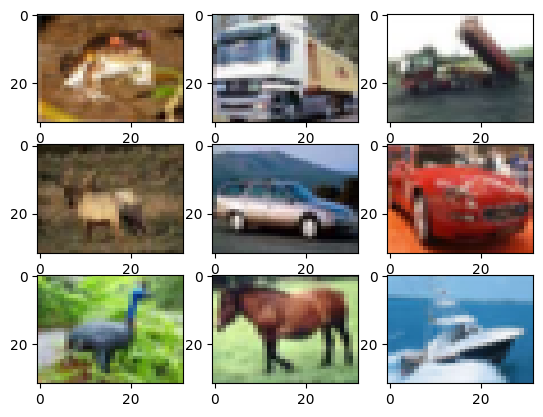

In [46]:
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(X_train[i], aspect='auto')
plt.show()

In [47]:
print('Class:')
for i in range(9):
    print(y_train[i], '-', dataClass[y_train[i][0]])

Class:
[6] - frog
[9] - truck
[9] - truck
[4] - deer
[1] - automobile
[1] - automobile
[2] - bird
[7] - horse
[8] - ship


In [48]:
# one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)

In [49]:
print(y_train[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [50]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.00005)

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop])

test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/5
  70/1563 [>.............................] - ETA: 33s - loss: 2.0564 - accuracy: 0.2473

KeyboardInterrupt: 

In [ ]:
model.summary()

In [67]:
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.8565401434898376
Test accuracy: 0.7134000062942505


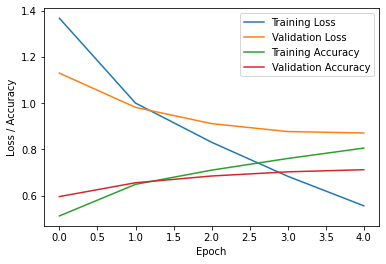

In [68]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

In [51]:
# one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)

In [154]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/5
3125/3125 [==============================] - 114s 36ms/step - loss: 1.3021 - accuracy: 0.5340 - val_loss: 1.0408 - val_accuracy: 0.6410
Epoch 2/5
3125/3125 [==============================] - 126s 40ms/step - loss: 0.9542 - accuracy: 0.6642 - val_loss: 0.9232 - val_accuracy: 0.6842
Epoch 3/5
3125/3125 [==============================] - 114s 36ms/step - loss: 0.7812 - accuracy: 0.7276 - val_loss: 0.8594 - val_accuracy: 0.7080
Epoch 4/5
3125/3125 [==============================] - 111s 35ms/step - loss: 0.6453 - accuracy: 0.7753 - val_loss: 0.8032 - val_accuracy: 0.7340
Epoch 5/5
157/157 [==============================] - 1s 7ms/step - loss: 0.8494 - accuracy: 0.7406


In [155]:
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.8494152426719666
Test accuracy: 0.7405999898910522


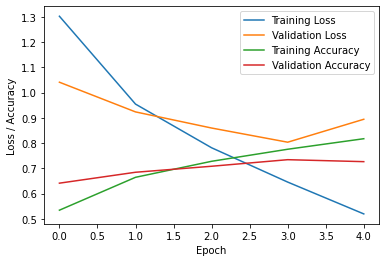

In [156]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

## Pokus 2

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.00005)

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop])

test_loss, test_acc = model.evaluate(X_test, y_test)

# POKUS 3

In [16]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.00005)

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop])

test_loss, test_acc = model.evaluate(X_test, y_test)


Epoch 1/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.7009 - accuracy: 0.3881 - val_loss: 1.3704 - val_accuracy: 0.4996 - lr: 0.0010
Epoch 2/5
 145/1563 [=>............................] - ETA: 37s - loss: 1.4372 - accuracy: 0.4892

KeyboardInterrupt: 

In [19]:
import tensorflow as tf

# Define the residual block
def residual_block(inputs, filters, stride=1):
    shortcut = inputs

    # First convolutional layer with 3x3 filters and ReLU activation
    x = tf.keras.layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=stride, padding='same', activation='relu')(inputs)
    # Batch normalization layer
    x = tf.keras.layers.BatchNormalization()(x)
    # Second convolutional layer with 3x3 filters and ReLU activation
    x = tf.keras.layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=1, padding='same', activation='relu')(x)
    # Batch normalization layer
    x = tf.keras.layers.BatchNormalization()(x)

    # Add the shortcut to the residual block output and apply ReLU activation
    if shortcut.shape[-1] != filters or stride != 1:
        shortcut = tf.keras.layers.Conv2D(filters=filters, kernel_size=(1, 1), strides=stride, padding='valid', activation='relu')(shortcut)
        shortcut = tf.keras.layers.BatchNormalization()(shortcut)

    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    return x


# Define the model architecture with residual blocks
inputs = tf.keras.layers.Input(shape=(32, 32, 3))

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = residual_block(x, filters=64)

x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = residual_block(x, filters=128)

x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = residual_block(x, filters=256)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(units=10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

                                                 
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.00005)

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop])

test_loss, test_acc = model.evaluate(X_test, y_test)
                                                 
                                                 

Epoch 1/5
  50/1563 [..............................] - ETA: 8:03 - loss: 2.5123 - accuracy: 0.2469

KeyboardInterrupt: 

In [20]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the model architecture
model = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (7, 7), padding='same', activation='relu'),
    layers.Conv2D(64, (7, 7), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.00005)

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stop])

test_loss, test_acc = model.evaluate(X_test, y_test)

model.summary()

Epoch 1/5
1563/1563 [==============================] - 114s 72ms/step - loss: 1.5240 - accuracy: 0.4345 - val_loss: 1.1871 - val_accuracy: 0.5766 - lr: 0.0010
Epoch 2/5
1256/1563 [=======================>......] - ETA: 21s - loss: 1.0650 - accuracy: 0.6198

KeyboardInterrupt: 